### Clean Eaglecrest Dataset Download from Mesowest 

Notebook contents 
* Load data for 5 years at Eaglecrest Mesonet Stations
* Clean the useful variables 
* Save as netcdfs for future use 

created by Cassie Lumbrazo\
last updated: Jan 2025\
run location: UAS linux\
python environment: **xarray**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

In [5]:
filename = '/home/cassie/data/fishcreek/mesonet/rawdata/DouglasIsland_AllStations_RawData_WY2024.txt'
# filename = '/home/cassie/data/fishcreek/mesonet/rawdata/DouglasIsland_AllStations_RawData_WY2025_until16March2025.txt'

# open
df = pd.read_csv(filename, sep = ",")

# make utc_valid a datetime and index the df by it 
df['datetime'] = pd.to_datetime(df['utc_valid'])
df = df.set_index('datetime')
df.head()

,station,utc_valid,PAIRZZZ,PCIRZZZ,PPDRZZZ,PPIRZZZ,PPPRZZZ,PPVRZZZ,PTIRZZZ,PTPRZZZ,...,USPRZZZ,VVIRZZZ,VVPRZZZ,XCIRZZZ,XCPRZZZ,XPPRZZZ,XPQRZZZ,XRIRZZZ,XWIRZZZ,XWPRZZZ
datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,ECEA2,2023-10-01 00:00:00,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2023-10-01 00:05:00,ECEA2,2023-10-01 00:05:00,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2023-10-01 00:10:00,ECEA2,2023-10-01 00:10:00,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2023-10-01 00:15:00,ECEA2,2023-10-01 00:15:00,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2023-10-01 00:20:00,ECEA2,2023-10-01 00:20:00,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN


In [9]:
df.station.unique()

array(['ECEA2', 'ECTA2', 'JECA2', 'NDIA2', 'PPSA2', 'SDIA2'], dtype=object)

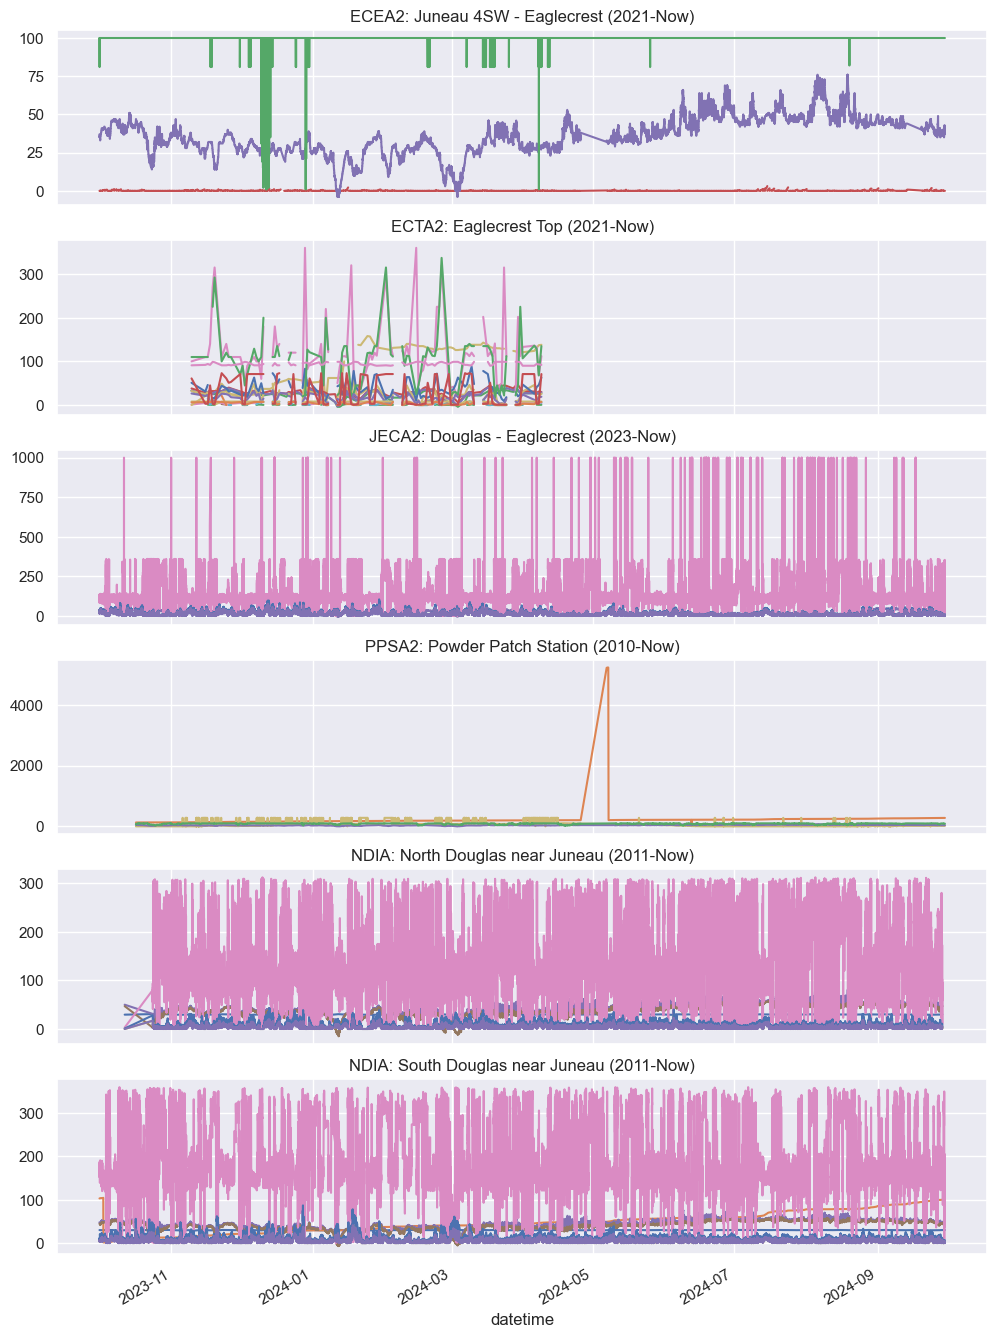

In [11]:
# so let's plot the data by station
fig, ax = plt.subplots(6,1, figsize=(12,18), sharex=True)

df.where(df['station'] == 'ECEA2').plot(ax=ax[0], label='ECEA2', legend=False)
df.where(df['station'] == 'ECTA2').plot(ax=ax[1], label='ECTA2', legend=False)
df.where(df['station'] == 'JECA2').plot(ax=ax[2], label='JECA2', legend=False)
df.where(df['station'] == 'PPSA2').plot(ax=ax[3], label='PPSA2', legend=False)
df.where(df['station'] == 'NDIA2').plot(ax=ax[4], label='NDIA2', legend=False)
df.where(df['station'] == 'SDIA2').plot(ax=ax[5], label='SDIA2', legend=False)

# add a title for each station name
ax[0].set_title('ECEA2: Juneau 4SW - Eaglecrest (2021-Now)')
ax[1].set_title('ECTA2: Eaglecrest Top (2021-Now)')
ax[2].set_title('JECA2: Douglas - Eaglecrest (2023-Now)')
ax[3].set_title('PPSA2: Powder Patch Station (2010-Now)')
ax[4].set_title('NDIA: North Douglas near Juneau (2011-Now)')
ax[5].set_title('NDIA: South Douglas near Juneau (2011-Now)')

plt.show()

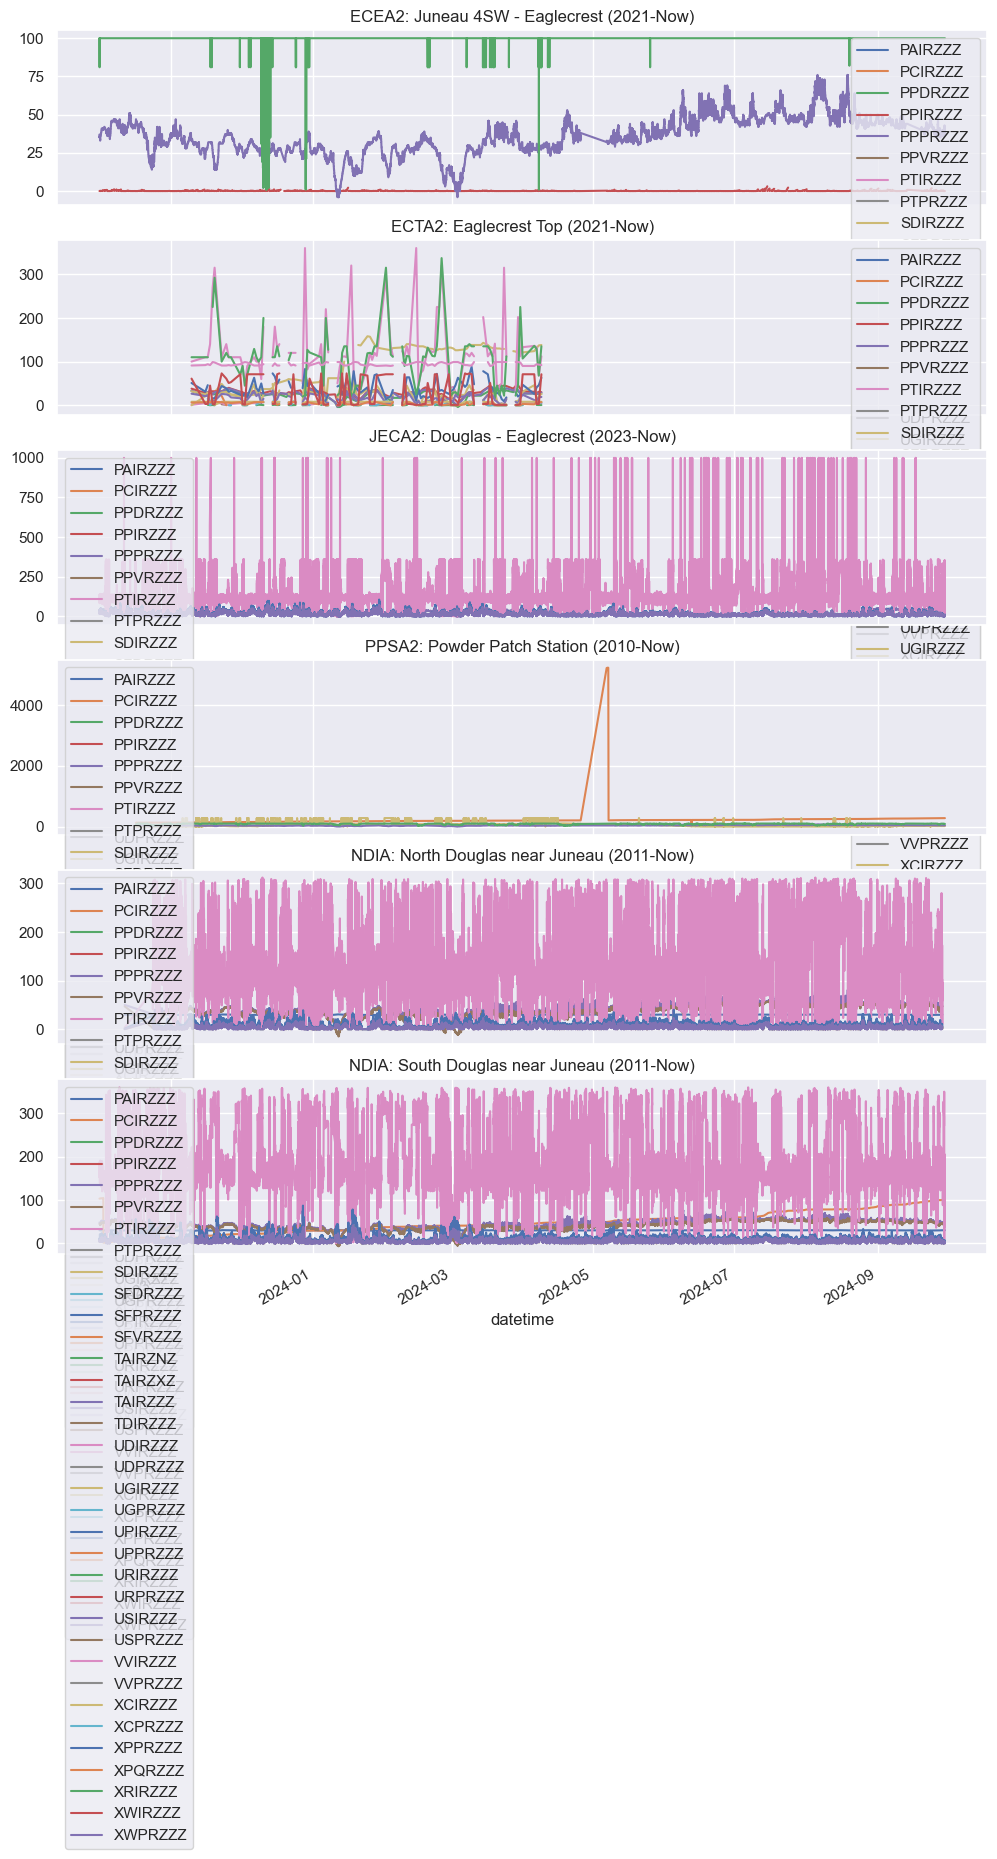

In [12]:
# so let's plot the data by station
fig, ax = plt.subplots(6,1, figsize=(12,18), sharex=True)

df.where(df['station'] == 'ECEA2').plot(ax=ax[0], label='ECEA2', legend=True)
df.where(df['station'] == 'ECTA2').plot(ax=ax[1], label='ECTA2', legend=True)
df.where(df['station'] == 'JECA2').plot(ax=ax[2], label='JECA2', legend=True)
df.where(df['station'] == 'PPSA2').plot(ax=ax[3], label='PPSA2', legend=True)
df.where(df['station'] == 'NDIA2').plot(ax=ax[4], label='NDIA2', legend=True)
df.where(df['station'] == 'SDIA2').plot(ax=ax[5], label='SDIA2', legend=True)

# add a title for each station name
ax[0].set_title('ECEA2: Juneau 4SW - Eaglecrest (2021-Now)')
ax[1].set_title('ECTA2: Eaglecrest Top (2021-Now)')
ax[2].set_title('JECA2: Douglas - Eaglecrest (2023-Now)')
ax[3].set_title('PPSA2: Powder Patch Station (2010-Now)')
ax[4].set_title('NDIA: North Douglas near Juneau (2011-Now)')
ax[5].set_title('NDIA: South Douglas near Juneau (2011-Now)')

plt.show()

Now, let's plot by variables and color by stations

In [15]:
df.columns

Index(['station', 'utc_valid', 'PAIRZZZ', 'PCIRZZZ', 'PPDRZZZ', 'PPIRZZZ',
       'PPPRZZZ', 'PPVRZZZ', 'PTIRZZZ', 'PTPRZZZ', 'SDIRZZZ', 'SFDRZZZ',
       'SFPRZZZ', 'SFVRZZZ', 'TAIRZNZ', 'TAIRZXZ', 'TAIRZZZ', 'TDIRZZZ',
       'UDIRZZZ', 'UDPRZZZ', 'UGIRZZZ', 'UGPRZZZ', 'UPIRZZZ', 'UPPRZZZ',
       'URIRZZZ', 'URPRZZZ', 'USIRZZZ', 'USPRZZZ', 'VVIRZZZ', 'VVPRZZZ',
       'XCIRZZZ', 'XCPRZZZ', 'XPPRZZZ', 'XPQRZZZ', 'XRIRZZZ', 'XWIRZZZ',
       'XWPRZZZ'],
      dtype='object')

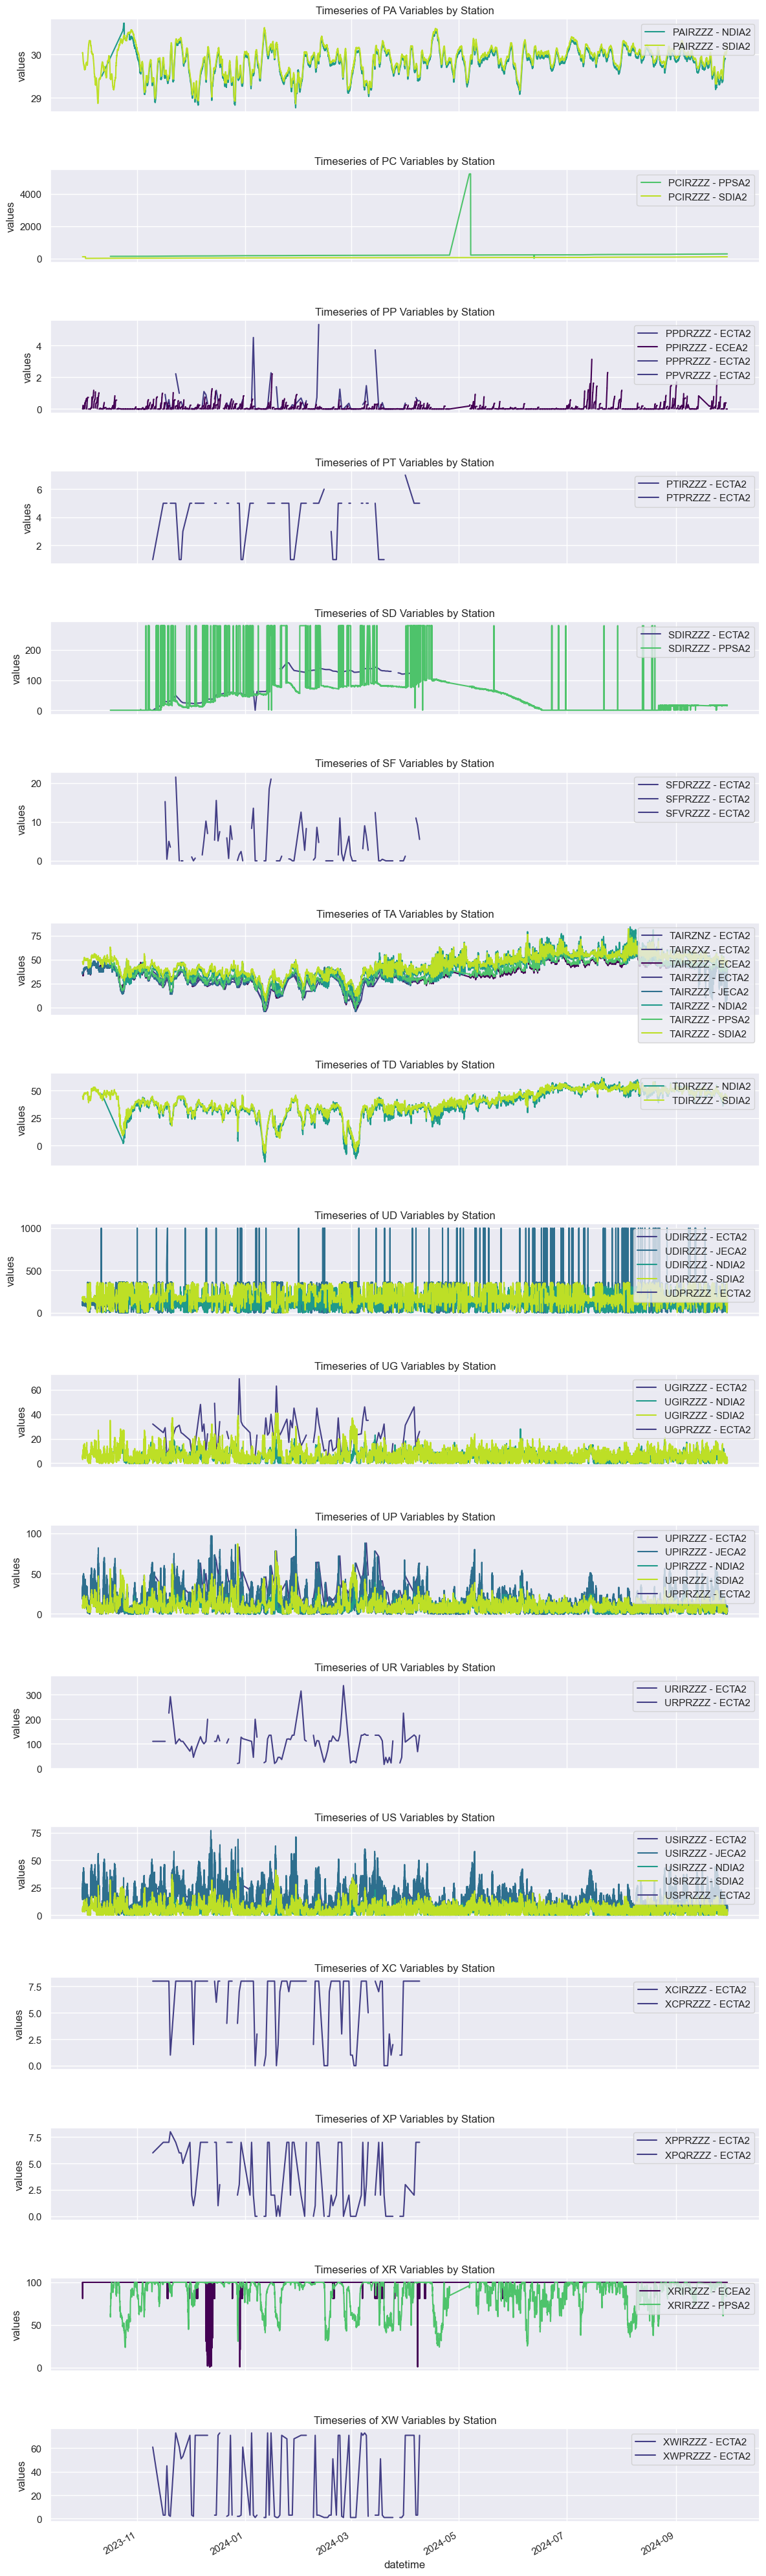

In [19]:
unique_stations = df['station'].unique()

# Create a color map for the unique stations
colors = plt.cm.viridis(np.linspace(0, 0.9, len(unique_stations)))
station_color_map = {station: color for station, color in zip(unique_stations, colors)}

# Create a figure with 14 subplots
fig, ax = plt.subplots(17, 1, figsize=(12, 40), sharex=True)

full_list_columns = [
'PAIRZZZ', # air pressure
'PCIRZZZ', # accumulated precip
'PPDRZZZ', 'PPIRZZZ', 'PPPRZZZ', 'PPVRZZZ', # precip
'PTIRZZZ', 'PTPRZZZ', # precip type 
'SDIRZZZ', # snow depth
'SFDRZZZ','SFPRZZZ', 'SFVRZZZ', #snow fall
'TAIRZNZ', 'TAIRZXZ', 'TAIRZZZ', # air temp
'TDIRZZZ', # dew point temp
'UDIRZZZ', 'UDPRZZZ', # wind direction
'UGIRZZZ', 'UGPRZZZ', # wind gust at observation time
'UPIRZZZ', 'UPPRZZZ', # peak wind speed
'URIRZZZ', 'URPRZZZ', # peak wind direction associated with peak wind speed 
'USIRZZZ', 'USPRZZZ', # wind speed 
'VVIRZZZ', 'VVPRZZZ', # voltage
'XCIRZZZ', 'XCPRZZZ', # total sky cover  (XV: weather visibility)
'XPPRZZZ', 'XPQRZZZ', # past weather
'XRIRZZZ', # relative humidity
'XWIRZZZ','XWPRZZZ'] # present weather

# Define the variable groups based on their prefixes
variable_groups = {
    'PA': ['PAIRZZZ'], # air pressure
    'PC': ['PCIRZZZ'],
    'PP': ['PPDRZZZ', 'PPIRZZZ', 'PPPRZZZ', 'PPVRZZZ'], # precipitation (includes liquid amount of new snowfall)
    'PT': ['PTIRZZZ', 'PTPRZZZ'], # precipitation type (0 = none, 1 = rain, 2 = snow, 3 = freezing rain, 4 = ice pellets)
    'SD': ['SDIRZZZ'],
    'SF': ['SFDRZZZ', 'SFPRZZZ', 'SFVRZZZ'],
    'TA': ['TAIRZNZ', 'TAIRZXZ', 'TAIRZZZ'],
    'TD': ['TDIRZZZ'],
    'UD': ['UDIRZZZ', 'UDPRZZZ'],
    'UG': ['UGIRZZZ', 'UGPRZZZ'],
    'UP': ['UPIRZZZ', 'UPPRZZZ'],
    'UR': ['URIRZZZ', 'URPRZZZ'],
    'US': ['USIRZZZ', 'USPRZZZ'],
    # 'V': ['VVIRZZZ', 'VVPRZZZ'], # voltage, not needed to plot anymore
    'XC': ['XCIRZZZ', 'XCPRZZZ'],
    'XP': ['XPPRZZZ', 'XPQRZZZ'],
    'XR': ['XRIRZZZ'],
    'XW': ['XWIRZZZ', 'XWPRZZZ']
}

# Loop through each group and plot the variables
for i, (prefix, variables) in enumerate(variable_groups.items()):
    for var in variables:
        for station in unique_stations:
            # Filter the DataFrame for the current station
            station_data = df[df['station'] == station]
            # Check if the variable exists in the station's data
            if var in station_data.columns and not station_data[var].isnull().all():
                # Plot the variable for the current station with the assigned color
                station_data[var].plot(ax=ax[i], label=f'{var} - {station}', color=station_color_map[station])
    
    # Set titles and labels for each subplot
    ax[i].set_title(f'Timeseries of {prefix} Variables by Station')
    ax[i].set_ylabel('values')
    ax[i].legend(loc='upper right')

# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')

plt.tight_layout()
plt.show()

Now, we only want to plot the variables we want to use for forcing, to get a better look and clean up. 

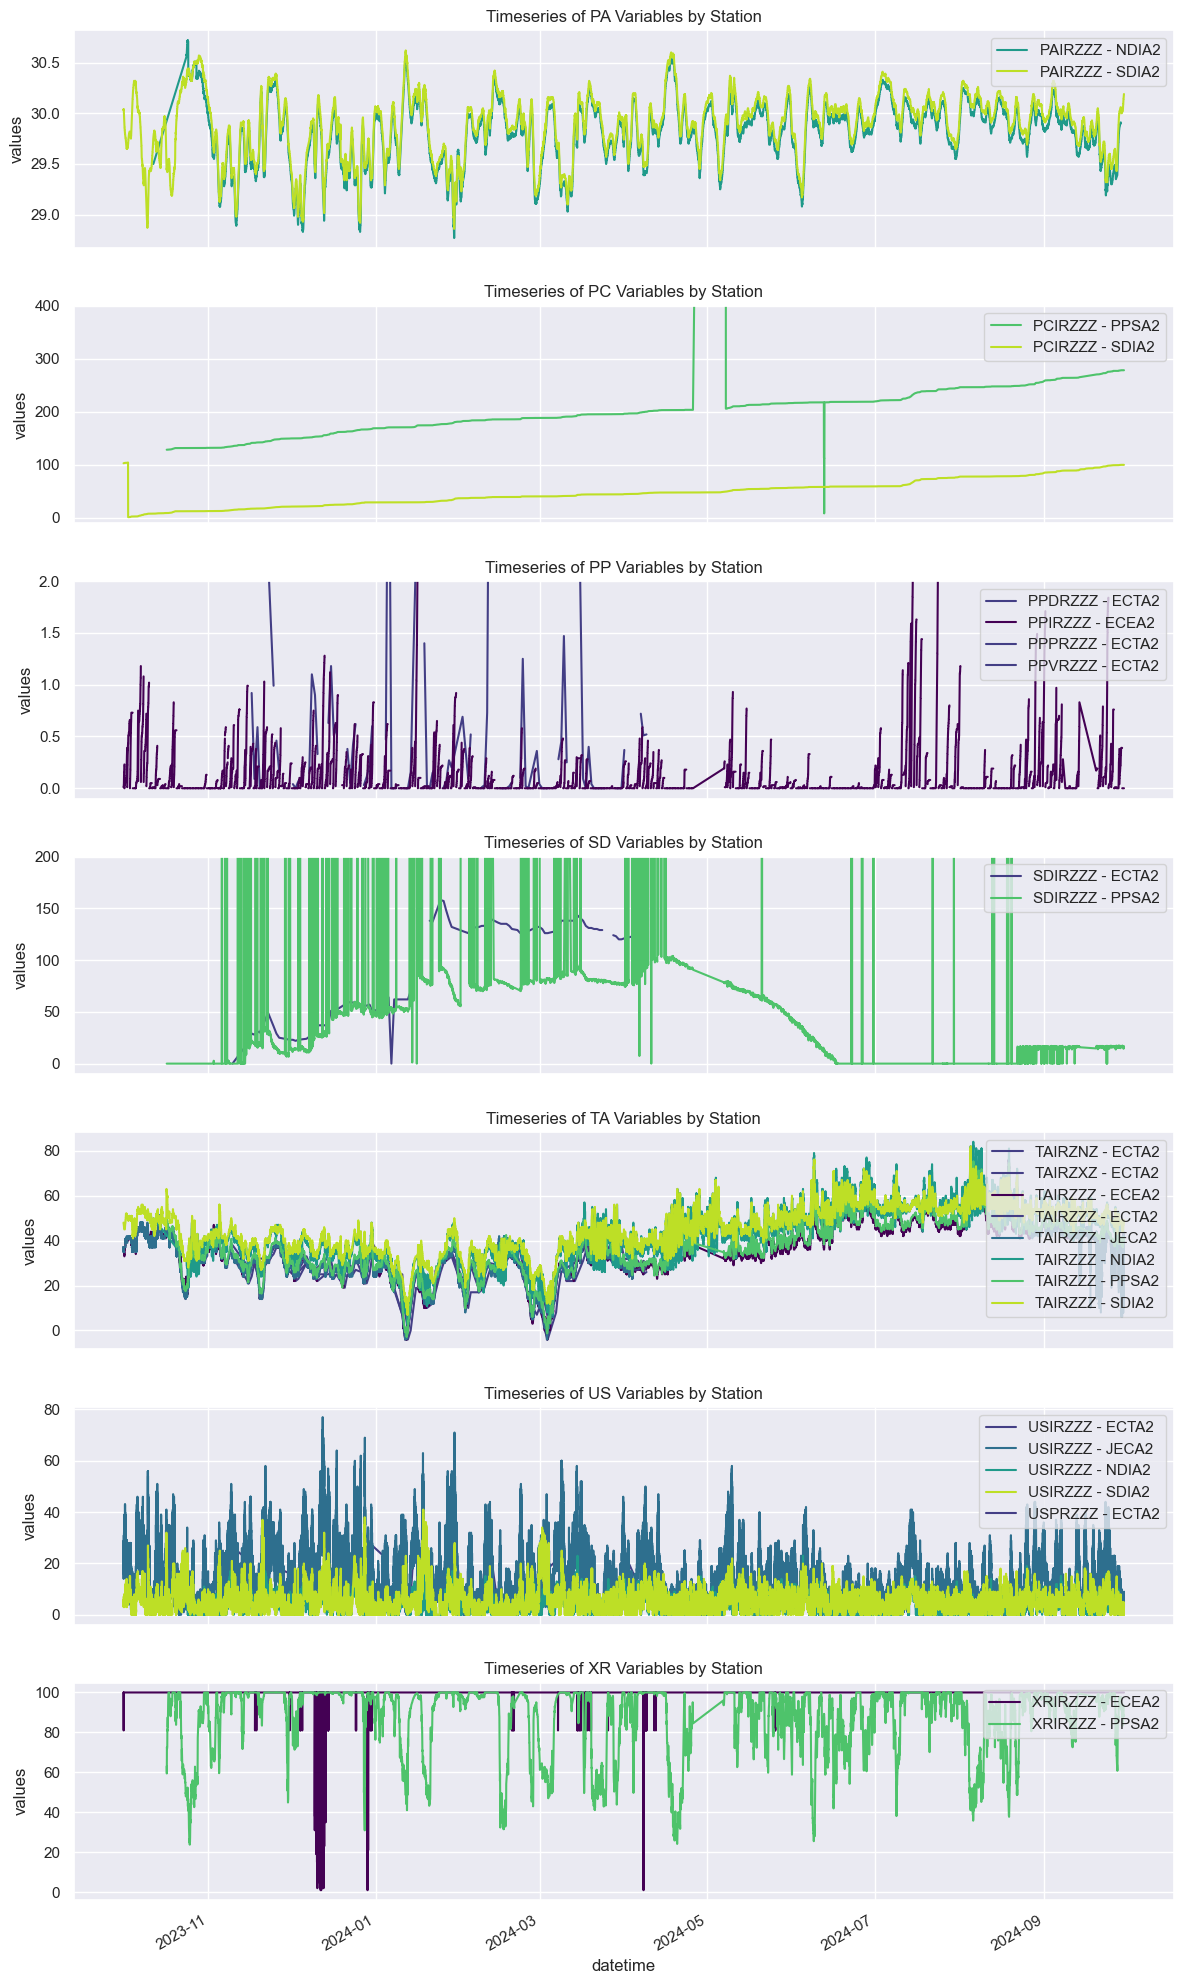

In [24]:
unique_stations = df['station'].unique()

# Create a color map for the unique stations
colors = plt.cm.viridis(np.linspace(0, 0.9, len(unique_stations)))
station_color_map = {station: color for station, color in zip(unique_stations, colors)}

# Create a figure with 14 subplots
fig, ax = plt.subplots(7, 1, figsize=(12, 20), sharex=True)

# Define the variable groups based on their prefixes
variable_groups = {
    'PA': ['PAIRZZZ'], # air pressure
    'PC': ['PCIRZZZ'],
    'PP': ['PPDRZZZ', 'PPIRZZZ', 'PPPRZZZ', 'PPVRZZZ'], # precipitation (includes liquid amount of new snowfall)
    # 'PT': ['PTIRZZZ', 'PTPRZZZ'], # precipitation type (0 = none, 1 = rain, 2 = snow, 3 = freezing rain, 4 = ice pellets)
    'SD': ['SDIRZZZ'],
    # 'SF': ['SFDRZZZ', 'SFPRZZZ', 'SFVRZZZ'],
    'TA': ['TAIRZNZ', 'TAIRZXZ', 'TAIRZZZ'],
    # 'TD': ['TDIRZZZ'],
    # 'UD': ['UDIRZZZ', 'UDPRZZZ'],
    # 'UG': ['UGIRZZZ', 'UGPRZZZ'],
    # 'UP': ['UPIRZZZ', 'UPPRZZZ'],
    # 'UR': ['URIRZZZ', 'URPRZZZ'],
    'US': ['USIRZZZ', 'USPRZZZ'],
    # 'V': ['VVIRZZZ', 'VVPRZZZ'], # voltage, not needed to plot anymore
    # 'XC': ['XCIRZZZ', 'XCPRZZZ'],
    # 'XP': ['XPPRZZZ', 'XPQRZZZ'],
    'XR': ['XRIRZZZ'],
    # 'XW': ['XWIRZZZ', 'XWPRZZZ']
}

# Loop through each group and plot the variables
for i, (prefix, variables) in enumerate(variable_groups.items()):
    for var in variables:
        for station in unique_stations:
            # Filter the DataFrame for the current station
            station_data = df[df['station'] == station]
            # Check if the variable exists in the station's data
            if var in station_data.columns and not station_data[var].isnull().all():
                # Plot the variable for the current station with the assigned color
                station_data[var].plot(ax=ax[i], label=f'{var} - {station}', color=station_color_map[station])
    
    # Set titles and labels for each subplot
    ax[i].set_title(f'Timeseries of {prefix} Variables by Station')
    ax[i].set_ylabel('values')
    ax[i].legend(loc='upper right')

# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')

# just limit the yaxis of a few of the graphs for viewing
ax[1].set_ylim(-10, 400)
ax[2].set_ylim(-0.1, 2)
ax[3].set_ylim(-10, 200)

plt.tight_layout()
plt.show()

### Lets go one variable at a time, to, 
* plot on it's own 
* investigate the quality of the dataset (looking for gaps, outliers, etc)
* determine the level of cleaning needed
* and finally, put everything in the sample temporal resolution to compare stations